In [6]:
# Connect the colab notebook with drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# from sklearn.linear_model import LogisticRegressionCV
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# from time import time
from operator import itemgetter
from scipy.stats import randint as sp_randint

from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier

In [8]:
dataset =  pd.read_csv("/content/drive/MyDrive/Customer_Churn/Cleaned_data_24_10_22.csv")
dataset.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [9]:
df = dataset[['Geography', 'Gender','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','Exited']].copy()
df.head(5)

,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,0,0,42,2,0.00,1,1,1,1
1,2,0,41,1,83807.86,1,0,1,0
2,0,0,42,8,159660.80,3,1,0,1
3,0,0,39,1,0.00,2,0,0,0
4,2,0,43,2,125510.82,1,1,1,0


In [10]:
df.shape

(15682, 9)

In [11]:
X = df.drop(['Exited'],axis=1)
y = df['Exited']

In [12]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [71]:
# build a classifier
clf = RandomForestClassifier(n_estimators=20)


# Utility function to report best scores
def report(grid_scores, n_top=3):
    top_scores = sorted(grid_scores, key=itemgetter(1), reverse=True)[:n_top]
    for i, score in enumerate(top_scores):
        print("Model with rank: {0}".format(i + 1))
        print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
              score.mean_validation_score,
              np.std(score.cv_validation_scores)))
        print("Parameters: {0}".format(score.parameters))
        print("")
n_features= int(0.1*8)

# specify parameters and distributions to sample from
param_dist = {"max_depth": [3, None],
              "max_features": (0,7),
              "min_samples_split": (2,11),
              "min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# run randomized search
n_iter_search = 20





# **Repeatable 50:50**

In [53]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.50, random_state=1)

In [70]:
rf_model1 = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=n_iter_search,cv=10)

rf_model1.fit(X_train1, y_train1)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
110 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py", line 450, in fit
    trees = Parallel(
  File "/usr/local/lib/python3.8/dist-packages/joblib/parallel.py", line 1085, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.8/dist-packages/joblib/parallel.py",

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(n_estimators=20),
                   n_iter=20,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, None],
                                        'max_features': (0, 7),
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fd50889bfd0>,
                                        'min_samples_split': (2, 11)})

In [63]:
print("Tuned Decision Tree Parameters: {}".format(rf_model1.best_params_))
print("Best score is {}".format(rf_model1.best_score_))

Tuned Decision Tree Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': None, 'max_features': 8, 'min_samples_leaf': 1, 'min_samples_split': 11}
Best score is 0.8223440140387366


In [17]:
dt_cv_predict_train1 = rf_model1.predict(X_train1)
print("Accuracy against training data: {0:.4f}".format(metrics.accuracy_score(y_train1, dt_cv_predict_train1)))
print()

Accuracy against training data: 0.9612



In [18]:
rf_cv_predict_test1 = rf_model1.predict(X_test1)
print("Accuracy against test data: {0:.4f}".format(metrics.accuracy_score(y_test1, rf_cv_predict_test1)))
print()

Accuracy against test data: 0.8357



In [19]:
print("Confusion Matrix")
print(metrics.confusion_matrix(y_test1, rf_cv_predict_test1))
print()

Confusion Matrix
[[3290  610]
 [ 678 3263]]



In [20]:
print("Classification Report")
print(metrics.classification_report(y_test1, rf_cv_predict_test1))
print()

Classification Report
              precision    recall  f1-score   support

           0       0.83      0.84      0.84      3900
           1       0.84      0.83      0.84      3941

    accuracy                           0.84      7841
   macro avg       0.84      0.84      0.84      7841
weighted avg       0.84      0.84      0.84      7841




# **Repeatable 80:20**

In [21]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.20, random_state=1)

In [22]:
rf_model2 = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=n_iter_search,cv=10)

rf_model2.fit(X_train2, y_train2)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
50 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py", line 450, in fit
    trees = Parallel(
  File "/usr/local/lib/python3.8/dist-packages/joblib/parallel.py", line 1085, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.8/dist-packages/joblib/parallel.py", 

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(n_estimators=20),
                   n_iter=20,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, None],
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fd509b87940>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fd509ba2430>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fd51a2a48b0>})

In [23]:
print("Tuned Decision Tree Parameters: {}".format(rf_model2.best_params_))
print("Best score is {}".format(rf_model2.best_score_))

Tuned Decision Tree Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': None, 'max_features': 4, 'min_samples_leaf': 4, 'min_samples_split': 9}
Best score is 0.8364271145084734


In [24]:
dt_cv_predict_train2 = rf_model2.predict(X_train2)
print("Accuracy against training data: {0:.4f}".format(metrics.accuracy_score(y_train2, dt_cv_predict_train2)))
print()

Accuracy against training data: 0.9004



In [25]:
rf_cv_predict_test2 = rf_model2.predict(X_test2)
print("Accuracy against test data: {0:.4f}".format(metrics.accuracy_score(y_test2, rf_cv_predict_test2)))
print()

Accuracy against test data: 0.8310



In [26]:
print("Confusion Matrix")
print(metrics.confusion_matrix(y_test2, rf_cv_predict_test2))
print()

Confusion Matrix
[[1306  255]
 [ 275 1301]]



In [27]:
print("Classification Report")
print(metrics.classification_report(y_test2, rf_cv_predict_test2))
print()

Classification Report
              precision    recall  f1-score   support

           0       0.83      0.84      0.83      1561
           1       0.84      0.83      0.83      1576

    accuracy                           0.83      3137
   macro avg       0.83      0.83      0.83      3137
weighted avg       0.83      0.83      0.83      3137




# **Stratified 50:50**

In [28]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.50, random_state=1,stratify=y)

In [29]:
rf_model3 = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=n_iter_search,cv=10)

rf_model3.fit(X_train3, y_train3)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
50 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py", line 450, in fit
    trees = Parallel(
  File "/usr/local/lib/python3.8/dist-packages/joblib/parallel.py", line 1085, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.8/dist-packages/joblib/parallel.py", 

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(n_estimators=20),
                   n_iter=20,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, None],
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fd509b87940>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fd509ba2430>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fd51a2a48b0>})

In [30]:
print("Tuned Decision Tree Parameters: {}".format(rf_model3.best_params_))
print("Best score is {}".format(rf_model3.best_score_))

Tuned Decision Tree Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': None, 'max_features': 3, 'min_samples_leaf': 6, 'min_samples_split': 2}
Best score is 0.8226009034186923


In [31]:
dt_cv_predict_train3 = rf_model3.predict(X_train3)
print("Accuracy against training data: {0:.4f}".format(metrics.accuracy_score(y_train3, dt_cv_predict_train3)))
print()

Accuracy against training data: 0.8716



In [32]:
rf_cv_predict_test3 = rf_model3.predict(X_test3)
print("Accuracy against test data: {0:.4f}".format(metrics.accuracy_score(y_test3, rf_cv_predict_test3)))
print()

Accuracy against test data: 0.8378



In [33]:
print("Confusion Matrix")
print(metrics.confusion_matrix(y_test3, rf_cv_predict_test3))
print()

Confusion Matrix
[[3332  588]
 [ 684 3237]]



In [34]:
print("Classification Report")
print(metrics.classification_report(y_test3, rf_cv_predict_test3))
print()

Classification Report
              precision    recall  f1-score   support

           0       0.83      0.85      0.84      3920
           1       0.85      0.83      0.84      3921

    accuracy                           0.84      7841
   macro avg       0.84      0.84      0.84      7841
weighted avg       0.84      0.84      0.84      7841




# **Stratified 80:20**

In [35]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(X, y, test_size=0.20, random_state=1,stratify=y)

In [36]:
rf_model4 = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=n_iter_search,cv=10)

rf_model4.fit(X_train4, y_train4)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
50 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py", line 450, in fit
    trees = Parallel(
  File "/usr/local/lib/python3.8/dist-packages/joblib/parallel.py", line 1085, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.8/dist-packages/joblib/parallel.py", 

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(n_estimators=20),
                   n_iter=20,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, None],
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fd509b87940>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fd509ba2430>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fd51a2a48b0>})

In [37]:
print("Tuned Decision Tree Parameters: {}".format(rf_model4.best_params_))
print("Best score is {}".format(rf_model4.best_score_))

Tuned Decision Tree Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': None, 'max_features': 1, 'min_samples_leaf': 1, 'min_samples_split': 7}
Best score is 0.8340375658450727


In [38]:
dt_cv_predict_train4 = rf_model4.predict(X_train4)
print("Accuracy against training data: {0:.4f}".format(metrics.accuracy_score(y_train4, dt_cv_predict_train4)))
print()

Accuracy against training data: 0.9312



In [39]:
rf_cv_predict_test4 = rf_model4.predict(X_test4)
print("Accuracy against test data: {0:.4f}".format(metrics.accuracy_score(y_test4, rf_cv_predict_test4)))
print()

Accuracy against test data: 0.8479



In [40]:
print("Confusion Matrix")
print(metrics.confusion_matrix(y_test4, rf_cv_predict_test4))
print()

Confusion Matrix
[[1353  215]
 [ 262 1307]]



In [41]:
print("Classification Report")
print(metrics.classification_report(y_test4, rf_cv_predict_test4))
print()

Classification Report
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1568
           1       0.86      0.83      0.85      1569

    accuracy                           0.85      3137
   macro avg       0.85      0.85      0.85      3137
weighted avg       0.85      0.85      0.85      3137




# **AUC-ROC**

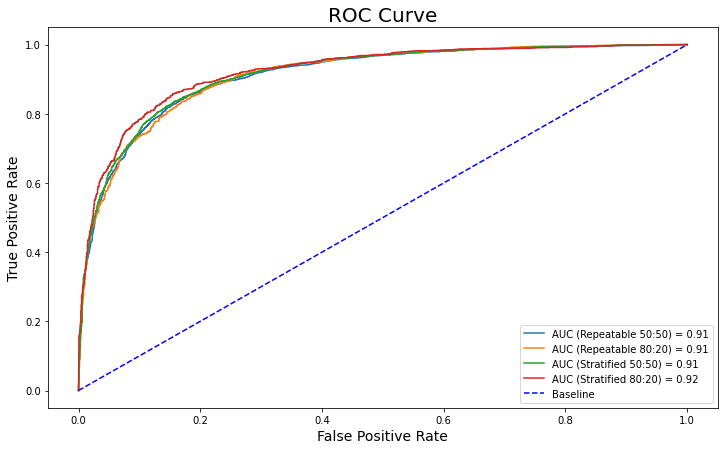

In [42]:
from sklearn.metrics import roc_auc_score, roc_curve

probs_m1 = rf_model1.predict_proba(X_test1)[:, 1]
probs_m2 = rf_model2.predict_proba(X_test2)[:, 1]
probs_m3 = rf_model3.predict_proba(X_test3)[:, 1]
probs_m4 = rf_model4.predict_proba(X_test4)[:, 1]


# y_test_int = y_test.replace({'Exited': 1, 'Not Exited': 0})
auc_mod1 = roc_auc_score(y_test1, probs_m1)
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test1, probs_m1)

auc_mod2 = roc_auc_score(y_test2, probs_m2)
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test2, probs_m2)

auc_mod3 = roc_auc_score(y_test3, probs_m3)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test3, probs_m3)

auc_mod4 = roc_auc_score(y_test4, probs_m4)
fpr_xg, tpr_xg, thresholds_xg = roc_curve(y_test4, probs_m4)

plt.figure(figsize=(12, 7))
plt.plot(fpr_lr, tpr_lr, label=f'AUC (Repeatable 50:50) = {auc_mod1:.2f}')
plt.plot(fpr_dt, tpr_dt, label=f'AUC (Repeatable 80:20) = {auc_mod2:.2f}')
plt.plot(fpr_rf, tpr_rf, label=f'AUC (Stratified 50:50) = {auc_mod3:.2f}')
plt.plot(fpr_xg, tpr_xg, label=f'AUC (Stratified 80:20) = {auc_mod4:.2f}')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--', label='Baseline')
plt.title('ROC Curve', size=20)
plt.xlabel('False Positive Rate', size=14)
plt.ylabel('True Positive Rate', size=14)
plt.legend();